# Activity 2 - Reichardt half- and full detector

Implement a Reichardt detector which detects a translatory motion of Delta = 5 pixels (rightward motion) in an image pair. As input, use the images line01.png and line02.png, which show two subsequent time steps.

### Import libraries

In [5]:
import Pkg
Pkg.add("Images")
Pkg.add("FileIO")
Pkg.add("Plots")

using Images
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


1. Implement a simple half-detector which compares the brightness of pixel x in image 1 to the brightness of pixel x+5 in image 2.

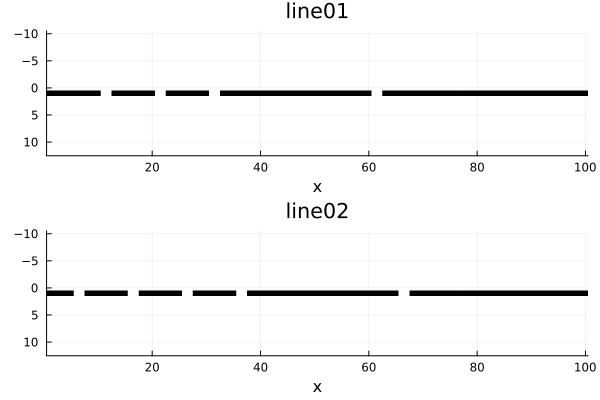

In [6]:
# Load the images
img1 = load("line/line01.png")
img2 = load("line/line02.png")

# Convert the images to a black and white image
img1 = Gray.(img1)
img2 = Gray.(img2)

# Show the images
line1 = plot(img1, title="line01", legend=false, xlabel="x")
line2 = plot(img2, title="line02", legend=false, xlabel="x")
plot(line1, line2, layout=(2, 1))

In [7]:
x = 1
Delta = 5

# Print brightness of pixel x and pixel x+Delta in image 2
println("Brightness of pixel x in image 1: ", img1[1, x])
println("Brightness of pixel x+Delta in image 2: ", img2[1, x+Delta])

Brightness of pixel x in image 1: Gray{N0f8}(0.0)
Brightness of pixel x+Delta in image 2: Gray{N0f8}(1.0)


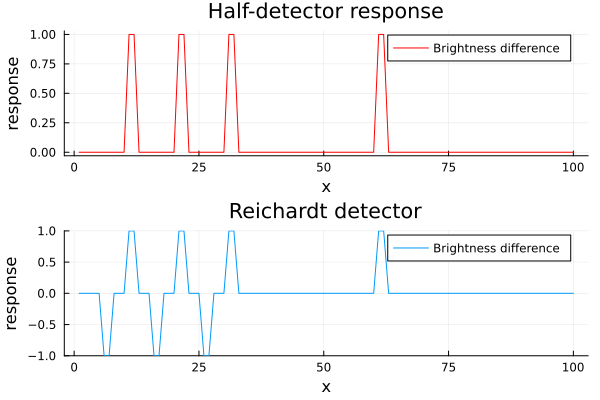

In [8]:
# Create an array of brightness differences
right = zeros(100)
left = zeros(100)
diff = zeros(100)

# Calculate the brightness difference for each pixel
for x in 1:(100-Delta)
    right[x] = img1[1, x] * img2[1, x+Delta]
    left[x] = img1[1, x+Delta] * img2[1, x]
    diff[x] = right[x] - left[x]
end

# Plot the response
plot_right = plot(right, label="Brightness difference", color="red", title="Half-detector response", xlabel="x", ylabel="response")
plot_diff = plot(diff, ylims=(-1, 1), label="Brightness difference", title="Reichardt detector", xlabel="x", ylabel="response")
plot(plot_right, plot_diff, layout=(2, 1))

### 4. Apply this detector to the image pair and explain its response properties

The basic idea is that when one pixel is in the dark of an object and the other is not, the difference in the intensity of light received by the two pixels will change. This change can be used to detect the movement of the object.
In our experiments we first detected a movement to the right using a half detector where we can see a response 3 times at the start of the lines. The first line has 3 white pixels in the first 40 pixels of the image and the second image has 4 similar pixels but shifted both to the right and to the left depending on the perspective, also the is a pixel in the position 60 that also looks that was shifted to the right, therfore a movement to the right is detected. Then we implemented a left detector that generated 3 responses for these exact same pixels, so a movement to the left is detected by this system. Finally we combined both detectors and we gave the left signal a negative value to differentiate it. The final plot has 4 responses to the right and 3 to the left.
<br/>
Also the signal is protected against flickering by comparing both detectors, if both gave the same signal then the signal is rejected, if not then the signal is accepted, since an object cannot move left and right at the same time.
On the other hand the detector is not very sensitive to the movement of the object, it only detects a movement of 5 pixels, so if the object falls in those other pixels that are not being read the detector will not detect it.